In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from transformers import AutoFeatureExtractor, BeitForSemanticSegmentation
from PIL import Image
import requests
import torch.nn as nn



In [4]:
'''
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
'''

'\nurl = "http://images.cocodataset.org/val2017/000000039769.jpg"\nimage = Image.open(requests.get(url, stream=True).raw)\n\nfeature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")\nmodel = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")\n'

In [5]:
'''
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# logits are of shape (batch_size, num_labels, height, width)
logits = outputs.logits
'''

'\ninputs = feature_extractor(images=image, return_tensors="pt")\noutputs = model(**inputs)\n# logits are of shape (batch_size, num_labels, height, width)\nlogits = outputs.logits\n'

In [6]:
'''
import torch.nn as nn
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
'''

'\nimport torch.nn as nn\nupsampled_logits = nn.functional.interpolate(\n    logits,\n    size=image.size[::-1],\n    mode="bilinear",\n    align_corners=False,\n)\n\npred_seg = upsampled_logits.argmax(dim=1)[0]\n'

In [7]:
def create_ade20k_label_colormap():
  """Creates a label colormap used in ADE20K segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])

In [8]:
'''
import matplotlib.pyplot as plt
import numpy as np
color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(create_ade20k_label_colormap())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\ncolor_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)\npalette = np.array(create_ade20k_label_colormap())\nfor label, color in enumerate(palette):\n    color_seg[pred_seg == label, :] = color\ncolor_seg = color_seg[..., ::-1]  # convert to BGR\n\nimg = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map\nimg = img.astype(np.uint8)\n\nplt.figure(figsize=(15, 10))\nplt.imshow(img)\nplt.show()\n'

In [9]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:200]")

In [11]:
ds

Dataset({
    features: ['image', 'annotation', 'scene_category'],
    num_rows: 200
})

In [12]:
ds['image'][115]
ds['image'][115].save("im_115.jpg")


In [13]:
ds['annotation'][115]
ds['annotation'][115].save("annotation_115.jpg")


In [14]:
ds['image'][30]
ds['image'][30].save("im_30.jpg")


In [15]:
ds['annotation'][30]
ds['annotation'][30].save("annotation_30.jpg")


In [16]:
ds['image'][40]
ds['image'][40].save("im_40.jpg")


In [17]:
ds['annotation'][40]
ds['annotation'][40].save("annotation_40.jpg")


In [18]:
import matplotlib.pyplot as plt
import numpy as np
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")

In [21]:
def segmentation_beit(image, name):
  inputs = feature_extractor(images=image, return_tensors="pt")
  outputs = model(**inputs)
  # logits are of shape (batch_size, num_labels, height, width)
  logits = outputs.logits
  upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
  )

  pred_seg = upsampled_logits.argmax(dim=1)[0] 
  color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
  palette = np.array(create_ade20k_label_colormap())
  for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
  color_seg = color_seg[..., ::-1]  # convert to BGR
  img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
  img = img.astype(np.uint8)

  plt.figure(figsize=(15, 10))
  plt.imshow(img)
  #img.save("segment_beit" + str(name)+".jpg")
  plt.show()

AttributeError: ignored

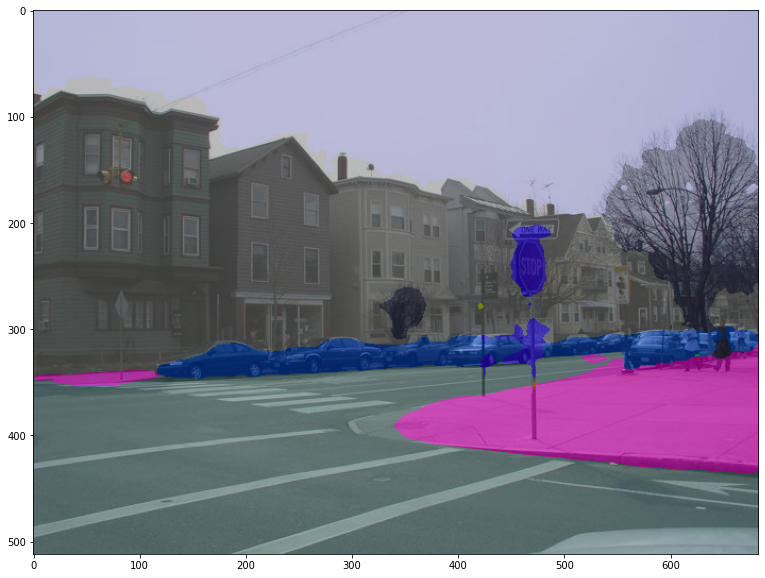

In [20]:
segmentation_beit(ds['image'][115],name = '_im115')

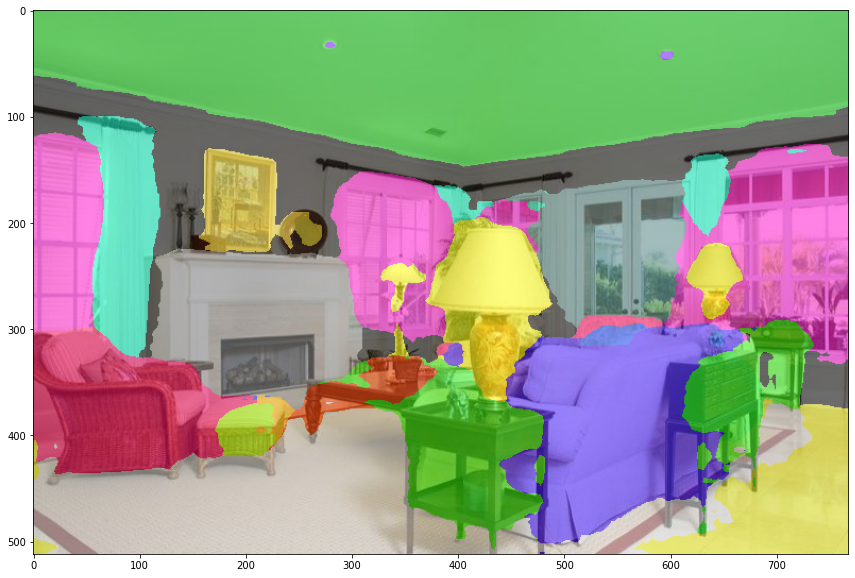

In [22]:
segmentation_beit(ds['image'][30],name = '_im30')

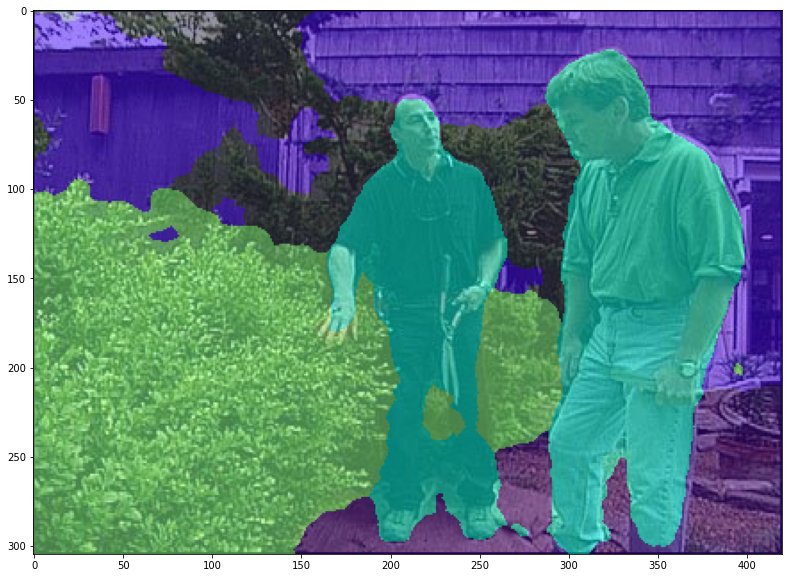

In [23]:
segmentation_beit(ds['image'][40],name='_Im40')

# Fine Tune


> Preprocess


> Evaluate


> Train


> Inference


> Indented block











# Preprocess



In [24]:
ds = ds.train_test_split(test_size=0.2)
train_ds = ds["train"]
test_ds = ds["test"]

import json
from huggingface_hub import cached_download, hf_hub_url

repo_id = "huggingface/label-files"
filename = "ade20k-id2label.json"
id2label = json.load(open(cached_download(hf_hub_url(repo_id, filename, repo_type="dataset")), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:594: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Downloading:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

In [25]:
from torchvision.transforms import ColorJitter

jitter = ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)

In [26]:
def train_transforms(example_batch):
    images = [jitter(x) for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = feature_extractor(images, labels)
    return inputs


def val_transforms(example_batch):
    images = [x for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = feature_extractor(images, labels)
    return inputs

In [27]:
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

# Evaluate

In [29]:
pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 6.5 MB/s eta 0:00:00


In [30]:
import evaluate

metric = evaluate.load("mean_iou")

In [31]:
def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = nn.functional.interpolate(
            logits_tensor,
            size=labels.shape[-2:],
            mode="bilinear",
            align_corners=False,
        ).argmax(dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()
        metrics = metric.compute(
            predictions=pred_labels,
            references=labels,
            num_labels=num_labels,
            ignore_index=255,
            reduce_labels=False,
        )
        for key, value in metrics.items():
            if type(value) is np.ndarray:
                metrics[key] = value.tolist()
        return metrics

# Train

In [32]:
from transformers import Trainer, TrainingArguments

In [33]:
training_args = TrainingArguments(
    output_dir="segformer-b0-scene-parse-150",
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 160
  Num Epochs = 50
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 4000
  Number of trainable parameters = 163407980


# Inference

In [ ]:
image = ds[25]["image"]
image

In [ ]:
from transformers import pipeline

segmenter = pipeline("image-segmentation", model="my_awesome_seg_model")
segmenter(image)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # use GPU if available, otherwise use a CPU
encoding = feature_extractor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)

In [ ]:
outputs = model(pixel_values=pixel_values)
logits = outputs.logits.cpu()

In [ ]:
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

In [ ]:
import matplotlib.pyplot as plt

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()